#  Ideas for fitting code:

- pickle all FF objects

In [1]:
%load_ext autoreload
%autoreload 2

from ff_energy.cli import load_config_maker, load_all_theory, charmm_jobs

# from ff_energy.structure import
from ff_energy.potential import FF, LJ
import numpy as np
from ff_energy.data import Data, plot_ecol, plot_intE, plot_LJintE
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import pandas as pd
from ff_energy.utils import pickle_output, read_from_pickle
from ff_energy.data import Data

sig_bound = (0.25, 2.5)
ep_bound = (0.0001, 0.5)
LJ_bound = [(sig_bound), (0.25, 0.6), (ep_bound), (ep_bound)]

atom_key_pairs [('CG331', 'CG331'), ('CG331', 'HGA3'), ('CG331', 'HGP1'), ('CG331', 'HT'), ('CG331', 'OG311'), ('CG331', 'OT'), ('HGA3', 'HGA3'), ('HGA3', 'HGP1'), ('HGA3', 'HT'), ('HGA3', 'OG311'), ('HGA3', 'OT'), ('HGP1', 'HGP1'), ('HGP1', 'HT'), ('HGP1', 'OG311'), ('HGP1', 'OT'), ('HT', 'HT'), ('HT', 'OG311'), ('HT', 'OT'), ('OG311', 'OG311'), ('OG311', 'OT'), ('OT', 'OT')]
0 ('CG331', 'CG331')
1 ('CG331', 'HGA3')
2 ('CG331', 'HGP1')
3 ('CG331', 'HT')
4 ('CG331', 'OG311')
5 ('CG331', 'OT')
6 ('HGA3', 'HGA3')
7 ('HGA3', 'HGP1')
8 ('HGA3', 'HT')
9 ('HGA3', 'OG311')
10 ('HGA3', 'OT')
11 ('HGP1', 'HGP1')
12 ('HGP1', 'HT')
13 ('HGP1', 'OG311')
14 ('HGP1', 'OT')
15 ('HT', 'HT')
16 ('HT', 'OG311')
17 ('HT', 'OT')
18 ('OG311', 'OG311')
19 ('OG311', 'OT')
20 ('OT', 'OT')


In [2]:
FUNC = LJ
BOUNDS = LJ_bound
ff_name = "pbe0dz_pc"
structure = "water_cluster"
pk = "pickles/water_cluster/pbe0dz/pbe0_dz.pc"


#########################################################

ff_pkls = Path("pickles/ff")
ff_pickles = ff_pkls.glob("*.pkl")
ff_pickles = [_.name for _ in ff_pickles]
struct_dist_pkls = Path("pickles/structures")
struct_dist_pickles = struct_dist_pkls.glob("*.pkl")
struct_dist_pickles = [_.name for _ in struct_dist_pickles]


pickled_ff = (ff_pkls / f"{ff_name}.pkl").exists()
pickled_dists = (struct_dist_pkls / f"{structure}.pkl").exists()
pickled_ff = True

if pickled_ff:
    print("Pickled FF exists!, loading: ", ff_pkls / f"{ff_name}.pkl")
    try:
        ff = next(read_from_pickle(ff_pkls / f"{ff_name}.pkl"))
    except StopIteration:
        print("Pickle read failed.")
        pickled_ff = False

if not pickled_ff:
    if pickled_dists:
        print("loading pickled distances/structure")
        structures, dists = next(
            read_from_pickle(f"pickles/structures/{structure}.pkl")
        )
    else:
        print("No pickled distances/structure information, calculating:")
        CMS = load_config_maker("pbe0dz", structure, "mdcm")
        jobs = charmm_jobs(CMS)
        dists = {_.name.split(".")[0]: _.distances for _ in jobs[0].structures}
        structures = [_ for _ in jobs[0].structures]
        pickle_output((structures, dists), name=f"structures/{structure}")

    s = structures[0]
    data_ = Data(pk)
    ff = FF(data_.data, dists, FUNC, BOUNDS, s)

# d = ff.data_save.sample(200)
# ff.data = d.copy()
args = [1.7682, 0.2245, -0.1521, -0.0460]

Pickled FF exists!, loading:  pickles/ff/pbe0dz_pc.pkl


In [3]:
print(len(ff.dists["test0"][15]))
print(len(ff.dists["test0"][17]))
print(len(ff.dists["test0"][20]))

190
380
190


In [6]:
# ff.data = ff.data_save
ff

FF: LJ

250
Index(['ECOL', 'KEY', 'TOTAL', 'ELEC', 'VDW', 'KEY', 'M_ENERGY', 'KEY',
       'n_monomers', 'C_ENERGY', 'n_pairs', 'intE', 'P_intE', 'LJX', 'LJ',
       'VDW_ERROR', 'VDW_SE', 'nb_intE', 'SE'],
      dtype='object')
19
110.1289280686283


,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,LJX,LJ,VDW_ERROR,VDW_SE,nb_intE,SE
test495,NaN,test495,24.92171,-83.61850,17.54292,test495,-1527.129876,test495,20,-1527.255655,190,-78.926606,-72.611238,4.691894,17.542900,0.000020,4.044037e-10,-66.07558,165.148345
test172,-135.161719,test172,21.97428,-64.60375,15.85306,test172,-1527.144976,test172,20,-1527.234200,190,-55.988240,-57.601651,8.615510,15.853047,0.000013,1.612507e-10,-48.75069,52.381944
test449,NaN,test449,23.23776,-85.08126,19.59697,test449,-1527.136952,test449,20,-1527.268943,190,-82.824748,-74.954931,2.256512,19.597022,-0.000052,2.679706e-09,-65.48429,300.693295
test222,NaN,test222,22.30096,-62.34919,9.58323,test222,-1527.147152,test222,20,-1527.247330,190,-62.861945,-61.510775,-0.512755,9.583256,-0.000026,6.929738e-10,-52.76596,101.929451
test443,NaN,test443,27.77185,-51.64020,10.86261,test443,-1527.130222,test443,20,-1527.205231,190,-47.068034,-45.168774,4.572166,10.862532,0.000078,6.087947e-09,-40.77759,39.568700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test215,NaN,test215,19.77446,-61.62208,12.14418,test215,-1527.154640,test215,20,-1527.250204,190,-59.966778,-56.165492,1.655302,12.144169,0.000011,1.171858e-10,-49.47790,110.016340
test220,NaN,test220,22.57880,-53.69537,10.61095,test220,-1527.146651,test220,20,-1527.214481,190,-42.563252,-44.181396,11.132118,10.610932,0.000018,3.248300e-10,-43.08442,0.271634
test432,NaN,test432,22.56968,-62.88457,9.80041,test432,-1527.143630,test432,20,-1527.236635,190,-58.360647,-64.742620,4.523923,9.800424,-0.000014,1.909683e-10,-53.08416,27.841458
test450,NaN,test450,25.04618,-85.62060,24.64935,test450,-1527.136401,test450,20,-1527.267112,190,-82.021419,-72.490626,3.599181,24.649338,0.000012,1.331706e-10,-60.97125,443.109135


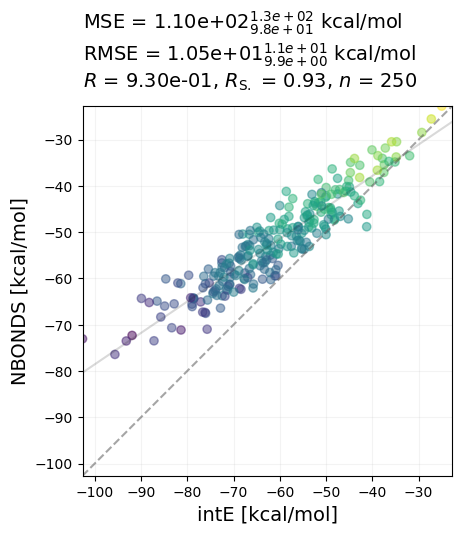

In [5]:
for i in range(1):
    # d = ff.data_save.sample(100)
    # ff.data = d.copy()
    print(len(ff.data))
    _ = ff.LJ_performace(ff.eval_func(args))
    print(_.keys())
    print(len(_.keys()))
    # _["nb_intE"] = _["NBONDS"]
    plot_intE(_)
    print(_["SE"].mean())
_

In [7]:
_["VDW_ERROR"].mean()

-6.648110919251771e-07

In [8]:
ff.data_save["LJX"] = ff.data_save["intE"] - ff.data_save["ELEC"]

ff.data_save.sort_values("LJX")[0:-250]

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,LJX
test368,NaN,test368,23.56305,-63.53451,6.56039,test368,-1527.141126,test368,20,-1527.257149,190,-72.804605,-71.924765,-9.270095
test300,NaN,test300,18.19354,-78.83190,17.07443,test300,-1527.161122,test300,20,-1527.301315,189,-87.971779,-76.920914,-9.139879
test51,NaN,test51,20.60442,-66.96660,13.66359,test51,-1527.158662,test51,20,-1527.278952,190,-75.482380,-69.236461,-8.515780
test277,NaN,test277,18.07725,-78.11780,9.31564,test277,-1527.160446,test277,20,-1527.297392,186,-85.934252,-75.905983,-7.816452
test420,NaN,test420,19.85170,-49.22644,4.12130,test420,-1527.154595,test420,20,-1527.245275,190,-56.901834,-56.744034,-7.675394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test36,NaN,test36,23.91233,-66.73701,22.48175,test36,-1527.137335,test36,20,-1527.232972,190,-60.012134,-53.817952,6.724876
test403,NaN,test403,21.82202,-82.86314,21.73406,test403,-1527.145413,test403,20,-1527.266646,188,-76.073795,-70.259656,6.789345
test147,-154.537413,test147,26.17221,-77.52023,17.75473,test147,-1527.127916,test147,20,-1527.240569,189,-70.690660,-66.515759,6.829570
test68,NaN,test68,22.28222,-78.51532,20.44304,test68,-1527.148652,test68,20,-1527.262877,190,-71.676649,-72.299069,6.838671


In [9]:
# plot_intE(_)

In [10]:
# ff.opt_results,ff.opt_results_df = [],[]

for i in range(4):
    d = ff.data_save.sort_values("LJX")[10:-10].sample(250)
    ff.data = d.copy()
    ff.fit_repeat(1, bounds=LJ_bound)
pickle_output(ff, "ff/pbe0dz_pc")

Optimizing LJ parameters...
function: LJ
bounds: [(0.25, 2.5), (0.25, 0.6), (0.0001, 0.5), (0.0001, 0.5)]
maxfev: 10000
initial guess: [0.4586864253453592, 0.265439391217366, 0.37937594625184934, 0.409007578257944]
final_loss_fn:  98.0203539648058
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 98.0203539648058
             x: [ 2.500e-01  2.500e-01  1.000e-04  1.000e-04]
           nit: 28
          nfev: 47
 final_simplex: (array([[ 2.500e-01,  2.500e-01,  1.000e-04,  1.000e-04],
                       [ 2.500e-01,  2.500e-01,  1.000e-04,  1.000e-04],
                       ...,
                       [ 2.500e-01,  2.500e-01,  1.000e-04,  1.000e-04],
                       [ 2.500e-01,  2.500e-01,  1.000e-04,  1.000e-04]]), array([ 9.802e+01,  9.802e+01,  9.802e+01,  9.802e+01,
                        9.802e+01]))
Set optimized parameters to FF object, self.df["LJ"] is updated.
Set optimized parameters to FF object, use FF.

In [25]:
# ff.get_best_loss()

In [26]:
print(len(ff.data))
# plot_intE(ff.get_best_df())

250


In [27]:
results = pd.DataFrame(ff.opt_results)
best_func = results.sort_values("fun")[:10]
# best_func

In [28]:
# x = np.arange(1.47,5,0.05)
# y = LJ(1.68387039e+00,2.67633293e-01,x)
# plt.plot(x, y)
# plt.axhline(0,c="k")

In [29]:
# for _ in best_func.iterrows():
#     i, _ = _
#     # print(_)
#     res = _["x"]
#     fun = _["fun"]
#     plt.title(f"{fun} {res}")
#     x = np.arange(0.1,5,0.05)
#     y = LJ(res[0]*2,res[2],x)
#     plt.plot(x, y)
#     y = LJ(res[1]*2,res[3],x)
#     plt.plot(x, y)
#     y = LJ(res[1]+res[1],np.sqrt(res[3]*res[2]),x)
#     plt.plot(x, y)


#     plt.axhline(0,c="k")
#     plt.ylim(-1,1)
#     plt.show()

,OT$\sigma$,HT$\sigma$,OT$\epsilon$,HT$\epsilon$,rmse
0,1.712916,0.25,0.190195,0.053815,111.604832
1,1.766772,0.25,0.099006,0.500000,25.087745
2,1.719033,0.25,0.160953,0.073978,26.702819
3,0.250000,0.25,0.000100,0.000100,27.694744


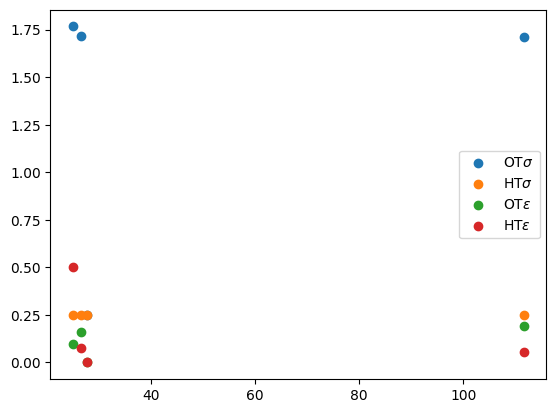

In [30]:
x = best_func["x"]
values = []

for _ in x:
    epsig = ["$\sigma$", "$\epsilon$"]
    names = []
    for es in epsig:
        for at in ff.atom_types:
            names.append(at + es)
    values.append({names[i]: _[i] for i in range(len(_))})


values = pd.DataFrame(values)
values["rmse"] = best_func["fun"]

values["rmse"]
values = values.dropna()
for i in range(4):
    key = values.keys()[i]
    plt.scatter(values["rmse"], values[key], label=key)

plt.legend()
values

36.7 (250) 25.1 (250)


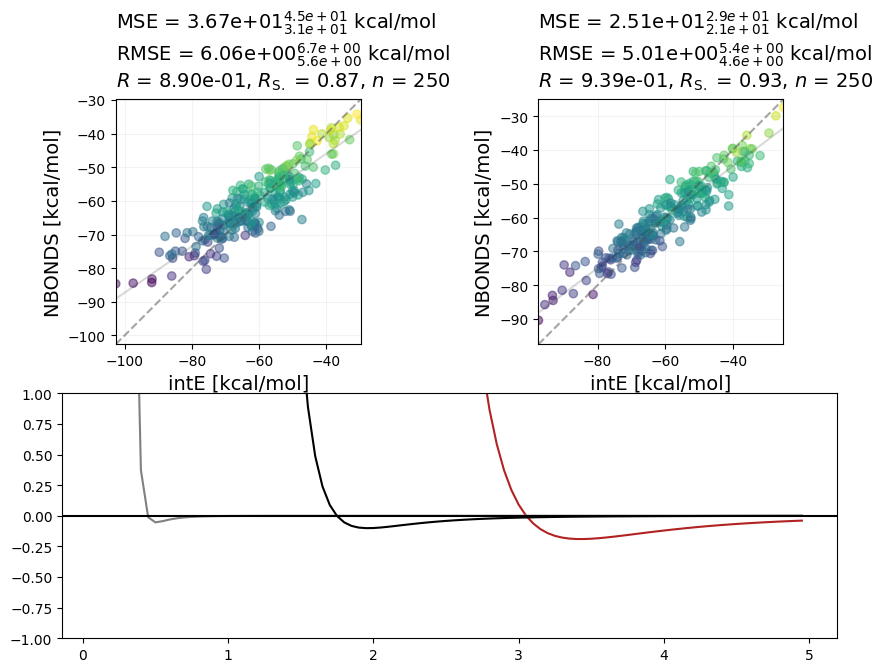

35.7 (250) 26.7 (250)


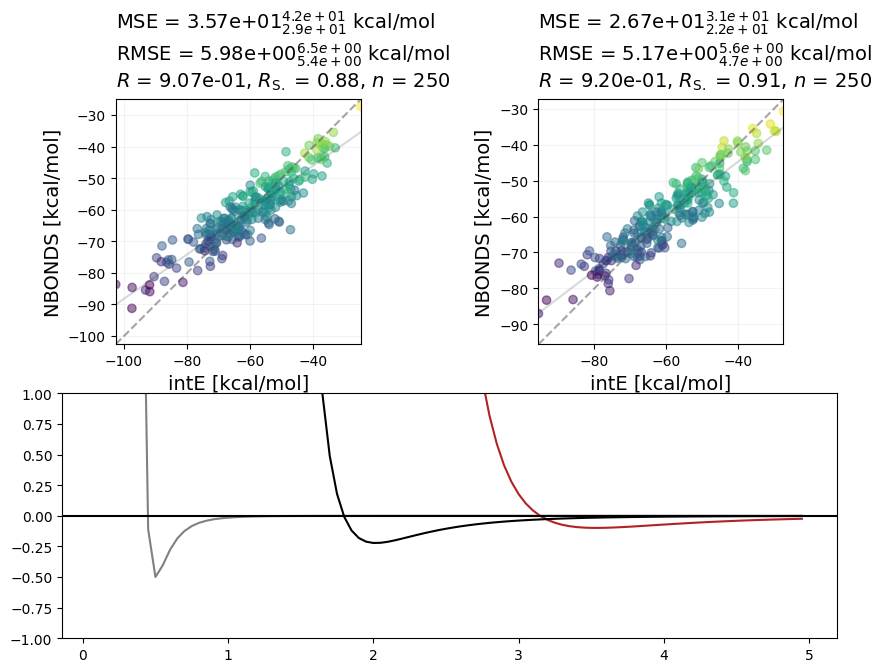

35.3 (250) 27.7 (250)


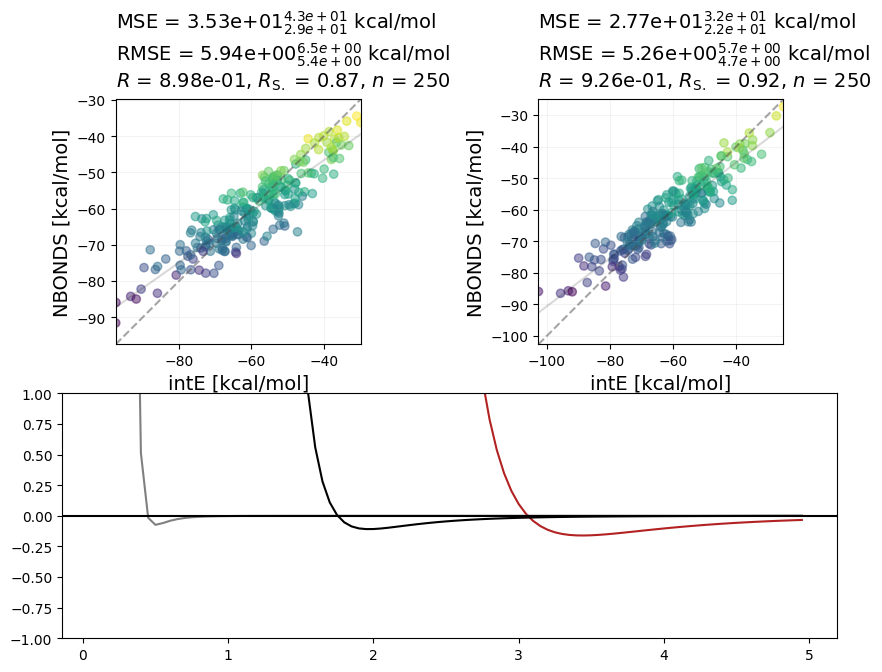

In [32]:
test_ = []
train_ = []
args_ = []
dfs_ = []

for res, data in zip(ff.opt_results, ff.opt_results_df):
    if res["fun"] < 30:
        test_keys = [_ for _ in list(ff.data_save.index) if _ not in data.index]
        test_df = ff.data_save.query("index in @test_keys")
        ff.data = test_df.copy()
        test_len = len(ff.data)
        test_res = ff.LJ_performace(ff.eval_func(res.x))

        # fig, ax = plt.subplots(1,3,figsize=(15,15))
        fig, ax = plt.subplot_mosaic([[0, 1], [2, 2]], figsize=(10, 7))

        plot_LJintE(test_res, ax=ax[0])

        ff.data = ff.data_save.query("index not in @test_keys").copy()
        train_len = len(ff.data)
        train_res = ff.LJ_performace(ff.eval_func(res.x))
        plot_LJintE(train_res, ax=ax[1])
        print(
            "{:.1f} ({}) {:.1f} ({})".format(
                test_res["SE"].mean(), test_len, train_res["SE"].mean(), train_len
            )
        )

        res = res.x
        x = np.arange(0.1, 5, 0.05)
        y = LJ(res[0] * 2, res[2], x)
        ax[2].plot(x, y, c="firebrick")
        y = LJ(res[1] * 2, res[3], x)
        ax[2].plot(x, y, c="grey")
        y = LJ(res[1] + res[0], np.sqrt(res[3] * res[2]), x)
        ax[2].plot(x, y, c="k")

        ax[2].axhline(0, c="k")
        ax[2].set_ylim(-1, 1)
        plt.show()

        test_.append(test_res["SE"].mean())
        train_.append(train_res["SE"].mean())
        args_.append(res)
        dfs_.append(test_res)

In [63]:
df = pd.DataFrame({"test": test_, "train": train_, "args": args_, "df": dfs_})

In [64]:
best = df[df["train"] < 35]
# best["test"] = np.sqrt(best["test"])
# best["train"] = np.sqrt(best["train"])
best

,test,train,args,df
1,41.845627,28.779799,"[1.1171632380087222, 1.3061632806084065, 0.092...",ECOL KEY TOTAL ELE...
2,36.460023,25.604027,"[1.6838703930908372, 0.5, 0.2676332929662778, ...",ECOL KEY TOTAL ELE...
5,41.990696,30.315251,"[1.8312343955243469, 0.5, 0.003427261925694101...",ECOL KEY TOTAL ELE...
6,36.460022,25.604027,"[1.6838703760721216, 0.5, 0.2676334053181146, ...",ECOL KEY TOTAL ELE...
7,42.046457,28.814921,"[0.857672321064236, 1.5542756601460763, 0.9208...",ECOL KEY TOTAL ELE...
9,36.460021,25.604027,"[1.683870373313792, 0.5000000070663984, 0.2676...",ECOL KEY TOTAL ELE...
11,34.136957,27.756310,"[1.681698874882414, 0.5, 0.2601602768656948, 0...",ECOL KEY TOTAL ELE...
14,39.589900,32.420930,"[1.793039732290775, 0.5, 0.006006226765843288,...",ECOL KEY TOTAL ELE...
16,38.210728,32.151226,"[1.237078665695329, 1.1964450238962234, 0.0380...",ECOL KEY TOTAL ELE...
17,41.508130,33.758932,"[2.2428705514523655, 0.668920301840941, 1.0000...",ECOL KEY TOTAL ELE...


In [65]:
best.iloc[0]["df"]

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,LJ,VDW_ERROR,VDW_SE,nb_intE,SE
test35,-5.831966,test35,22.57516,-66.12227,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,4.821171,6.231039,38.825853,-61.301099,123.857553
test416,-10.215694,test416,22.50934,-85.28629,18.34414,test416,-1527.144250,test416,20,-1527.266591,190,-76.769596,-74.781045,10.081732,8.262408,68.267381,-75.204558,2.449343
test32,-7.208282,test32,21.82520,-56.84954,12.91939,test32,-1527.150816,test32,20,-1527.240719,188,-56.414440,-51.561895,5.433026,7.486364,56.045652,-51.416514,24.979259
test366,-8.607171,test366,20.50987,-72.69114,19.03236,test366,-1527.153859,test366,20,-1527.241818,190,-55.194750,-57.596713,7.871960,11.160400,124.554524,-64.819180,92.629655
test117,-87.465907,test117,24.19257,-38.84255,8.80992,test117,-1527.145615,test117,20,-1527.193103,190,-29.798988,-34.976411,6.609046,2.200874,4.843846,-32.233504,5.926868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test243,NaN,NaN,21.38169,-81.52287,24.00845,test243,-1527.144311,test243,20,-1527.252924,190,-68.154990,-62.508613,13.866330,10.142120,102.862591,-67.656540,0.248452
test485,NaN,NaN,22.29913,-68.91623,16.80388,test485,-1527.143345,test485,20,-1527.244126,190,-63.240355,-61.349966,7.863094,8.940786,79.937648,-61.053136,4.783927
test69,NaN,NaN,22.13509,-52.09271,11.25710,test69,-1527.146558,test69,20,-1527.223038,190,-47.991404,-46.502707,6.457556,4.799544,23.035623,-45.635154,5.551916
test410,NaN,NaN,21.17052,-81.04502,22.95152,test410,-1527.148658,test410,20,-1527.244400,189,-60.078386,-65.655287,9.052541,13.898979,193.181626,-71.992479,141.945620


Text(0, 0.5, 'Train')

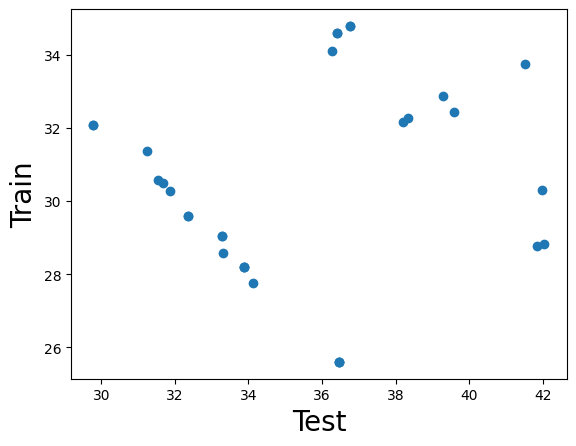

In [66]:
plt.scatter(best["test"], best["train"])
plt.xlabel("Test", fontsize=20)
plt.ylabel("Train", fontsize=20)

In [67]:
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import matplotlib.pyplot as plt

# # Prepare the data for the PathPatch below.
# Path = mpath.Path
# codes, verts = zip(*[
#     (Path.MOVETO, [0.018, -0.11]),
#     (Path.CURVE4, [-0.031, -0.051]),
#     (Path.CURVE4, [-0.115, 0.073]),
#     (Path.CURVE4, [-0.03, 0.073]),
#     (Path.LINETO, [-0.011, 0.039]),
#     (Path.CURVE4, [0.043, 0.121]),
#     (Path.CURVE4, [0.075, -0.005]),
#     (Path.CURVE4, [0.035, -0.027]),
#     (Path.CLOSEPOLY, [0.018, -0.11])])

# artists = [
#     mpatches.Circle((0, 0), 0.1, ec="none"),
#     mpatches.Rectangle((-0.025, -0.05), 0.05, 0.1, ec="none"),
#     mpatches.Wedge((0, 0), 0.1, 30, 270, ec="none"),
#     mpatches.RegularPolygon((0, 0), 5, radius=0.1),
#     mpatches.Ellipse((0, 0), 0.2, 0.1),
#     mpatches.Arrow(-0.05, -0.05, 0.1, 0.1, width=0.1),
#     mpatches.PathPatch(mpath.Path(verts, codes), ec="none"),
#     mpatches.FancyBboxPatch((-0.025, -0.05), 0.05, 0.1, ec="none",
#                             boxstyle=mpatches.BoxStyle("Round", pad=0.02)),
#     mlines.Line2D([-0.06, 0.0, 0.1], [0.05, -0.05, 0.05], lw=5),
# ]

# axs = plt.figure(figsize=(6, 6), layout="constrained").subplots(3, 3)
# for i, (ax, artist) in enumerate(zip(axs.flat, artists)):
#     artist.set(color=mpl.colormaps["hsv"](i / len(artists)))
#     ax.add_artist(artist)
#     ax.set(title=type(artist).__name__,
#            aspect=1, xlim=(-.2, .2), ylim=(-.2, .2))
#     ax.set_axis_off()
# plt.show()

In [68]:
import seaborn as sns
import matplotlib as mpl

# cmap = sns.color_palette("icefire", as_cmap=True)
# # cmap()
# # cmap = mpl.cm.cool
# norm = mpl.colors.Normalize(vmin=5, vmax=10)

# plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#              cax=ax, orientation='horizontal', label='Some Units')

In [69]:
# sns.choose_diverging_palette(as_cmap=True)

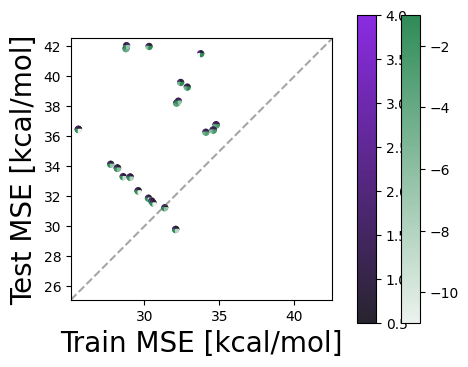

In [70]:
# cmap1 = sns.cubehelix_palette(start=.5, rot=-.99, as_cmap=True)
# cmap2 = sns.cubehelix_palette(start=.2, rot=-.99, as_cmap=True)
# cmap1 = sns.color_palette("Blues", as_cmap=True)
# cmap2 = sns.color_palette("Reds", as_cmap=True)
cmap1 = sns.color_palette("light:seagreen", as_cmap=True)
cmap2 = sns.color_palette("dark:blueviolet", as_cmap=True)


fig, ax = plt.subplots(
    1, 3, figsize=(4.5, 4), gridspec_kw={"width_ratios": [3.5, 0.25, 0.25]}
)

plt.subplots_adjust(wspace=0.25)

quarters = [
    (360, 90),
    (90, 180),
    (180, 270),
    (270, 360),
]


def plot_circle(x, y, ax, res):
    # print(res)
    size = 0.2
    quarters = [
        (90, 180),
        (0, 90),
        (180, 270),
        (270, 0),
    ]
    for i, (a, b) in enumerate(quarters):
        move = 0.0
        if i == 1:
            wedge = mpatches.Wedge((x, y), size, a, b)
        elif i == 0:
            wedge = mpatches.Wedge((x, y), size, a, b)
        elif i == 2:
            wedge = mpatches.Wedge((x, y + move), size, a, b)
        else:
            wedge = mpatches.Wedge((x, y + move), size, a, b)
        # wedge.set(color=mpl.colormaps["hsv"](i / 4))
        if i == 0 or i == 1:
            # print(res[i])
            cval = norm2(res[i])
            cmap = cmap2
        else:
            # print(res[i],np.log(res[i]))
            cval = norm1(np.log(res[i]))
            cmap = cmap1
        wedge.set(color=cmap(cval))
        if x < 27:
            wedge.set(alpha=1)
        ax.add_artist(wedge)
        # ax.set(aspect=1, xlim=(-.2, .2), ylim=(-.2, .2))
    return ax


norm1 = mpl.colors.Normalize(vmin=-11, vmax=-1)
norm2 = mpl.colors.Normalize(vmin=0.5, vmax=4)


# plt.scatter(best["test"], best["train"])
ax[0].set_xlabel("Train MSE [kcal/mol]", fontsize=20)
ax[0].set_ylabel("Test MSE [kcal/mol]", fontsize=20)
# plt.colorbar(cmap)
# plt.gca().set_axis_off()
minlim = min([best["test"].min(), best["train"].min()]) - 0.5
maxlim = max([best["test"].max(), best["train"].max()]) + 0.5

plt.colorbar(
    mpl.cm.ScalarMappable(norm=norm2, cmap=cmap2),
    cax=ax[1],
    orientation="vertical",
    label="",
)
plt.colorbar(
    mpl.cm.ScalarMappable(norm=norm1, cmap=cmap1),
    cax=ax[2],
    orientation="vertical",
    label="",
)

for x, y, res in zip(best["train"], best["test"], best["args"]):
    ax[0] = plot_circle(x, y, ax[0], res)

ax[0].set_xlim(minlim, maxlim)
ax[0].set_ylim(minlim, maxlim)
# ax[0].set_ylim(25, 29.5)
ax[0].plot(ax[0].get_xlim(), ax[0].get_ylim(), ls="--", c=".3", alpha=0.5)
# ax[0].grid()
ax[0].set_aspect(1)
plt.savefig("test.pdf", bbox_inches="tight")
plt.show()

In [85]:
from scipy.stats import bootstrap

rng = np.random.default_rng()


def boot_strap(best_res):
    data = (best_res["SE"],)  # samples must be in a sequence
    res = bootstrap(
        data, np.mean, confidence_level=0.95, random_state=rng, n_resamples=99999
    )
    print([np.sqrt(_) for _ in [data[0].mean(), *res.confidence_interval]])
    print()
    # plt.hist(data)
    # fig, ax = plt.subplots()
    # ax.hist(res.bootstrap_distribution, bins=10)
    # ax.set_title('Bootstrap Distribution')
    # ax.set_xlabel('statistic value')
    # ax.set_ylabel('frequency')
    # plt.show()


for i in range(len(best)):
    print(i, best.iloc[i]["args"])
    best_res = best.iloc[i]["df"]
    boot_strap(best_res)

0 [2.18863786e+00 5.01979202e-01 1.16221449e-02 1.22542465e-03]
[5.258061222834217, 4.928240162017293, 5.635217518595031]

1 [2.05267978e+00 5.00000000e-01 2.92584087e-02 7.26318017e-04]
[5.250615725798329, 4.919723098726593, 5.629031679447502]

2 [2.05216402e+00 5.05536295e-01 2.93561785e-02 6.86727574e-04]
[5.250552365419344, 4.918093328179624, 5.631758994170619]

3 [2.25556410e+00 5.00000000e-01 7.70712169e-03 1.22067537e-03]
[5.265355813602289, 4.931998169601272, 5.645641353337261]

4 [3.82891951e+00 5.50109668e-01 1.05486861e-05 2.31341006e-05]
[5.318294417937005, 4.984492116330265, 5.702409263123657]

5 [3.31948549e+00 5.00000000e-01 6.80701626e-05 1.78830950e-05]
[5.2640102539490705, 4.935025932065009, 5.634261667303115]

6 [2.14903312e+00 5.00000000e-01 1.66227038e-02 1.00000000e-05]
[5.193120434580334, 4.870002152641806, 5.56438119335041]

7 [2.14967099e+00 5.06719922e-01 1.65505576e-02 1.00000000e-05]
[5.192891077974372, 4.8684860741072695, 5.565759008970995]

8 [2.14903247e+

27.64720782307286 24.257214295913368 31.681689168314147


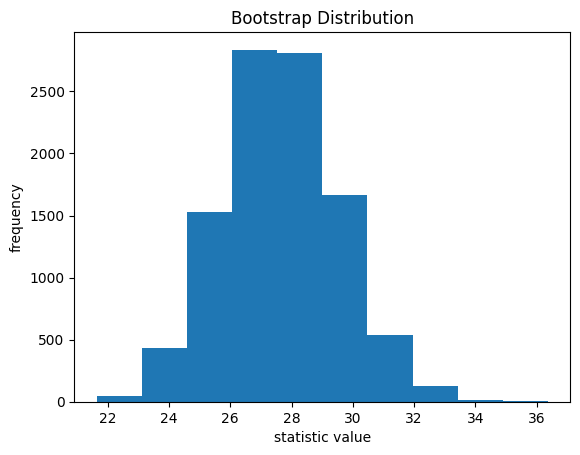